In [40]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
df = pd.read_csv('Stores.csv')
print(df.head())
print('-'*80)
print(df.tail())
print('-'*80)
print(df.info())

   Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0          1        1659             1961                   530        66490
1          2        1461             1752                   210        39820
2          3        1340             1609                   720        54010
3          4        1451             1748                   620        53730
4          5        1770             2111                   450        46620
--------------------------------------------------------------------------------
     Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
891        892        1582             1910                  1080        66390
892        893        1387             1663                   850        82080
893        894        1200             1436                  1060        76440
894        895        1299             1560                   770        96610
895        896        1174             1429                  1

In [8]:
df.duplicated().value_counts()

False    896
dtype: int64

In [11]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


<AxesSubplot:xlabel='Store_Sales', ylabel='Count'>

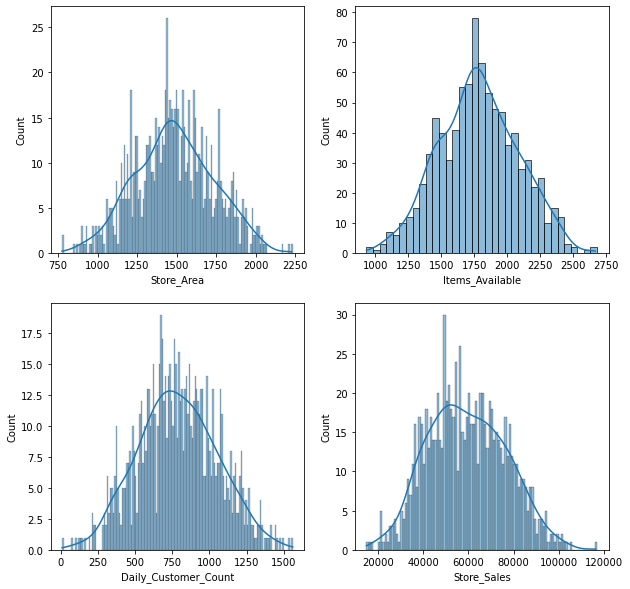

In [17]:
fig,axes = plt.subplots(2,2,figsize=(10,10))
sns.histplot(data=df,x='Store_Area',binwidth=10,kde=True,ax=axes[0,0])
sns.histplot(data = df, x = 'Items_Available',binwidth = 50,kde=True,ax=axes[0,1])
sns.histplot(data = df, x = 'Daily_Customer_Count',binwidth = 10,kde=True,ax=axes[1,0])
sns.histplot(data = df, x = 'Store_Sales',binwidth = 1000,kde=True,ax=axes[1,1])

<AxesSubplot:>

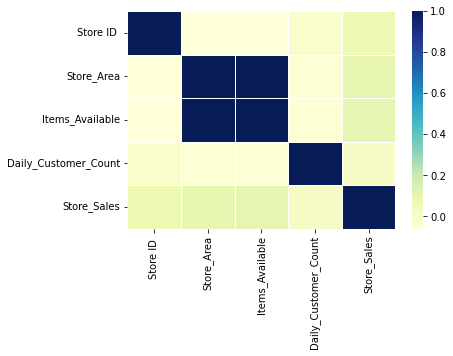

In [19]:
sns.heatmap(df.corr(), cmap='YlGnBu',linewidths= 0.5, linecolor = 'white')

<AxesSubplot:xlabel='Store_Area', ylabel='Items_Available'>

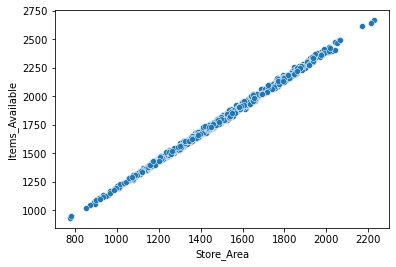

In [20]:
sns.scatterplot(x=df['Store_Area'], y=df['Items_Available'])

In [25]:
high_sales = df.sort_values(by='Store_Sales', ascending=False).head(100)
high_sales

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
649,650,1989,2414,860,116320
868,869,1775,2104,980,105150
432,433,1365,1638,680,102920
408,409,1303,1587,1310,102310
758,759,1486,1758,820,101820
...,...,...,...,...,...
50,51,1514,1820,910,81820
752,753,1648,2017,930,81720
331,332,1633,1968,330,81470
621,622,1383,1687,830,81390


In [26]:
high_sales.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,100.000000,100.000000,100.00000,100.000000,100.000000
mean,514.140000,1501.630000,1801.68000,801.100000,88794.800000
std,252.210751,278.123316,332.16799,258.655791,6474.174879
min,30.000000,932.000000,1138.00000,100.000000,81390.000000
25%,342.250000,1290.000000,1547.50000,660.000000,83967.500000
50%,557.500000,1506.000000,1811.00000,815.000000,87195.000000
75%,733.500000,1703.000000,2053.75000,957.500000,92317.500000
max,895.000000,2229.000000,2667.00000,1310.000000,116320.000000


<AxesSubplot:xlabel='Items_Available', ylabel='Store_Sales'>

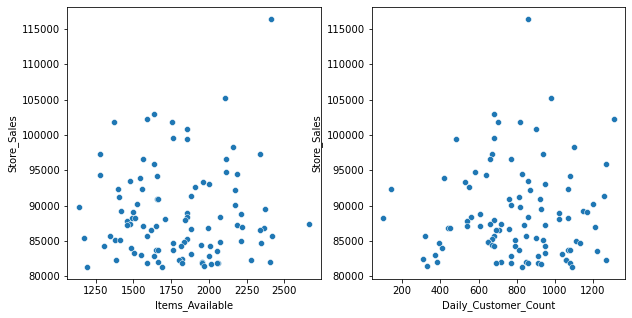

In [31]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(x=high_sales['Daily_Customer_Count'],y=high_sales['Store_Sales'])
sns.scatterplot(x=high_sales['Items_Available'],y=high_sales['Store_Sales'], ax=axes[0])

<AxesSubplot:xlabel='Daily_Customer_Count', ylabel='Store_Sales'>

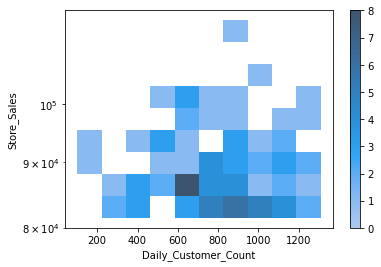

In [38]:
sns.histplot(x=high_sales['Daily_Customer_Count'], y=high_sales['Store_Sales'],cbar=True, log_scale=(False,True))

Dropping the index column

In [41]:
df.drop(df.columns[[0]], axis = 1, inplace = True)

In [42]:
df.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [44]:
import missingno as msno

In [ ]:
msno.bar(df, figsize= (16,5), color= 'red')